In [2]:
import pandas as pd
import json


with open("fide_profiles.txt","r") as w:
    dff = pd.DataFrame([json.loads(x) for x in w.readlines()])


df_blitz = dff[["blitz","fide"]]


df_rapid = dff[["rapid","fide"]]
df_classical = dff[["classical","fide"]]





,index,blitz,classical,fide,name,rapid
0,0,1631,1712,1136,tuxmanischerTiger,1873
1,1,1493,1996,1318,Alex2506,1661
2,2,1719,1281,1447,BilalCayir20,1525
3,3,1392,1467,1000,EVDEKAL1,1496
4,4,1812,1656,2000,FaridGuliyev,2101
5,5,1745,1435,1900,harryhonor,1902
6,6,1947,1929,1641,PiotrHoffmann,2007
7,7,1732,1755,1832,samislovian,1784
8,8,1536,1311,1149,KubovSzarganov,1617
9,9,1889,1948,1600,BOGDANCHESS24,1854


In [3]:
# cut out < 1000 fide and > 2900
from sklearn.linear_model import LinearRegression

def check_bounds(fide, lichess, colname, lr, df):

        res = lr.predict([[lichess]])[0][0]

        upper = res + 2 * df[colname].std()
        lower = res - 2 * df[colname].std()

        if fide >= lower and fide <= upper:
            return True

        return False

def prepare_dataset(df, colname):

    df = df[ (df["fide"] >= 1000) & (df["fide"] < 2900)]
    df = df[ df["fide"] % 100 > 0]




    X= df[[colname]]
    y = df[["fide"]]

    lr = LinearRegression().fit(X, y)

    df = df[df.apply(lambda x: check_bounds(x["fide"],x[colname], colname, lr, df), axis=1)]

    df = df[df[colname] != 1500]

    return df


In [4]:

df_blitz = prepare_dataset(df_blitz, "blitz")
df_rapid = prepare_dataset(df_rapid, "rapid")
df_classical = prepare_dataset(df_classical, "classical")





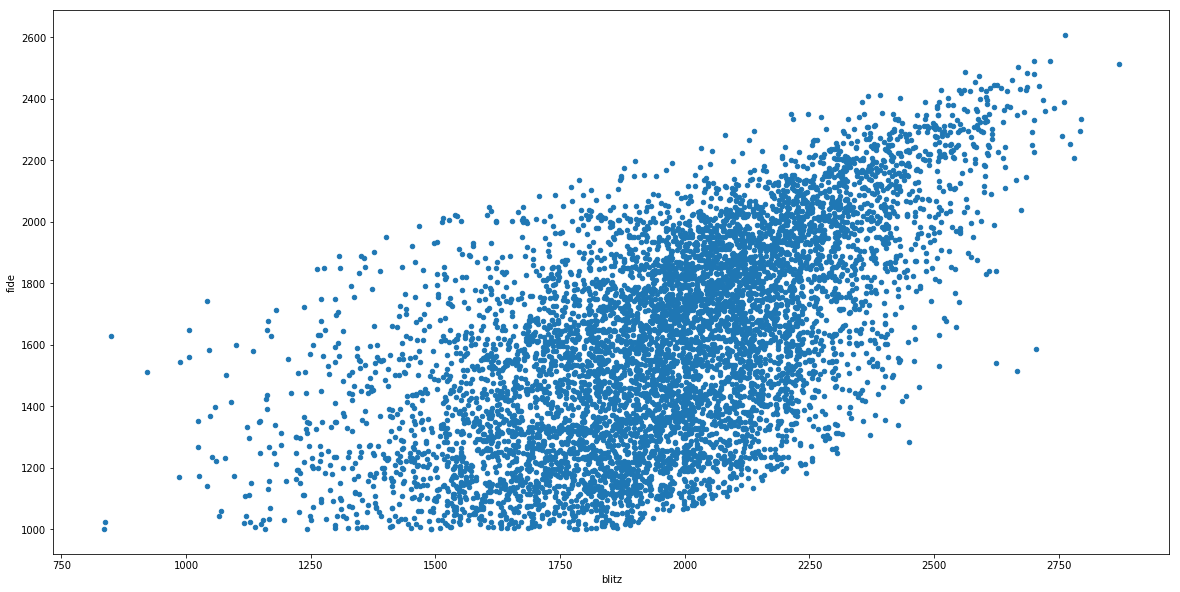

In [5]:
df_blitz.plot.scatter(x="blitz",y="fide",figsize=(20,10))

In [5]:
#df_all = df_rapid.join(df_blitz,lsuffix="_TODEL0",how="inner").join(df_classical, lsuffix="_TODEL1",how="inner")
df_all = df_rapid.join(df_blitz,lsuffix="_TODEL0",how="inner")

df_all.shape

(6999, 4)

In [7]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

df_prep = df_all[["fide","blitz","rapid"]]



X = df_prep[["blitz","rapid"]]
y = df_prep["fide"].ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

m = SVR()
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10,100,0.1]}


clf = GridSearchCV(m, parameters, cv=5, n_jobs=4, verbose=True,  scoring="neg_mean_squared_error")
clf.fit(X_train, y_train)







Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed: 10.6min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=4,
             param_grid={'C': [1, 10, 100, 0.1], 'kernel': ('linear', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=True)

In [8]:
y_pred = clf.best_estimator_.predict(X_test)

xx = pd.DataFrame()

xx["pred"] = pd.Series(y_pred)
xx["test"] = y_test


abs(xx["pred"] - xx["test"]).mean()

208.49622349710089

In [9]:
clf.best_estimator_.predict([[2522,2449]])

array([2054.69070534])

In [10]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

df_prep = df_all[["fide","blitz","rapid"]]

X = df_prep[["blitz","rapid"]]
y = df_prep["fide"].ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


m = RandomForestRegressor()
parameters = {'max_depth': [10,20,50,80,100,200, None], 'n_estimators':[ 50,100,200,500,1000,2000]}


rt = GridSearchCV(m, parameters, cv=5, n_jobs=4, verbose=True, scoring="neg_mean_squared_error")
rt.fit(X_train, y_train)



Fitting 5 folds for each of 42 candidates, totalling 210 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  55 tasks      | elapsed:   27.2s
[Parallel(n_jobs=4)]: Done 210 out of 210 | elapsed:  2.4min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=4,
             param_grid={'max_depth': [10, 20, 50, 80, 100,

In [11]:
y_pred = rt.best_estimator_.predict(X_test)

xx = pd.DataFrame()

xx["pred"] = pd.Series(y_pred)
xx["test"] = y_test


abs(xx["pred"] - xx["test"]).mean()


195.62559280552426

In [12]:
rt.best_estimator_.predict([[1620,1873]])

array([1426.64092807])

In [14]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np

df_prep = df_all[["fide","blitz","rapid"]]

X = df_prep[["blitz","rapid",]]
y = df_prep["fide"].ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


m = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}


lrr = GridSearchCV(m, parameters, cv=5, n_jobs=4, verbose=True, scoring="neg_mean_squared_error")
lrr.fit(X_train, y_train)



Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 out of  40 | elapsed:    1.5s remaining:    0.2s
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    2.3s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='warn', n_jobs=4,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=True)

In [15]:
y_pred = lrr.best_estimator_.predict(X_test)

xx = pd.DataFrame()

xx["pred"] = pd.Series(y_pred)
xx["test"] = y_test


abs(xx["pred"] - xx["test"]).mean()


204.556334399923

In [16]:

# first neural network with keras tutorial
from numpy import loadtxt
from  tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# load the dataset

df_prep = df_all[["fide","blitz","rapid"]]

X = df_prep[["blitz","rapid",]]
y = df_prep["fide"].ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


# scale it 
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)


ssy = StandardScaler()
y_train_scaled = ssy.fit_transform(y_train.reshape(-1,1))

# define the keras model
model = Sequential()
#model.add(Dense(12, input_dim=2, activation='relu'))
#model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='relu'))
# compile the keras model
model.compile(loss='mean_squared_error', optimizer='adam')
# fit the keras model on the dataset
model.fit(X_train_scaled, y_train_scaled, epochs=150, batch_size=1)


Epoch 1/150
5599/5599 [==============================] - 2s 434us/step - loss: 0.7692
Epoch 2/150
5599/5599 [==============================] - 2s 424us/step - loss: 0.7440
Epoch 3/150
5599/5599 [==============================] - 2s 423us/step - loss: 0.7433
Epoch 4/150
5599/5599 [==============================] - 2s 417us/step - loss: 0.7428
Epoch 5/150
5599/5599 [==============================] - 2s 413us/step - loss: 0.7428
Epoch 6/150
5599/5599 [==============================] - 2s 412us/step - loss: 0.7430
Epoch 7/150
5599/5599 [==============================] - 2s 417us/step - loss: 0.7426
Epoch 8/150
5599/5599 [==============================] - 2s 433us/step - loss: 0.7429
Epoch 9/150
5599/5599 [==============================] - 3s 452us/step - loss: 0.7428
Epoch 10/150
5599/5599 [==============================] - 2s 439us/step - loss: 0.7425
Epoch 11/150
5599/5599 [==============================] - 2s 443us/step - loss: 0.7428
Epoch 12/150
5599/5599 [============================

In [29]:
X_test_transformed = ss.transform(X_test)


pred = ssy.inverse_transform(model.predict(X_test_transformed))


import itertools
import numpy as np


merged = list(itertools.chain(*pred))



nn = pd.DataFrame()
nn["pred"] = pd.Series(merged)
nn["is"] = pd.Series(y_test)

print(np.mean(np.abs(nn.pred - nn["is"])))
nn



226.90260681152344


,pred,is
0,1614.501221,1790
1,1701.048706,1586
2,1614.501221,2010
3,1669.281860,1587
4,1614.501221,1222
5,1944.910156,1978
6,1614.501221,1648
7,1723.671265,1739
8,1614.501221,1314
9,1739.078125,1650
